In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, StratifiedKFold, RandomizedSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, f1_score,roc_auc_score, make_scorer, precision_recall_curve
from sklearn.pipeline import Pipeline 

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

import numpy as np
import matplotlib.pyplot as plt 

In [2]:
nic = pd.read_csv("NIC.csv",header=None)

In [3]:
nic.head()

,0
0,911232910V
1,937370580V
2,937784210V
3,940491240V
4,942251610V


In [4]:
nic.columns = ['ID']

In [5]:
nic.head()

,ID
0,911232910V
1,937370580V
2,937784210V
3,940491240V
4,942251610V


In [6]:
nic.shape

(5023, 1)

In [7]:
nic.isnull().sum()

ID    0
dtype: int64

In [8]:
nic['ID']=nic['ID'].astype(str)

In [9]:
nic.dtypes

ID    object
dtype: object

In [10]:
nic['Extracted_']=nic['ID'].str[:9]

In [11]:
nic.head()

,ID,Extracted_
0,911232910V,911232910
1,937370580V,937370580
2,937784210V,937784210
3,940491240V,940491240
4,942251610V,942251610


In [12]:
# nic['Extracted_1']=nic['ID'].str[:8]

In [13]:
nic['Birth_year']=nic['ID'].str.strip().str[0:2]

In [14]:
nic.head()

,ID,Extracted_,Birth_year
0,911232910V,911232910,91
1,937370580V,937370580,93
2,937784210V,937784210,93
3,940491240V,940491240,94
4,942251610V,942251610,94


In [15]:
nic['Birthdayof_year']=nic['ID'].str.strip().str[2:5]

In [16]:
nic.head()

,ID,Extracted_,Birth_year,Birthdayof_year
0,911232910V,911232910,91,123
1,937370580V,937370580,93,737
2,937784210V,937784210,93,778
3,940491240V,940491240,94,049
4,942251610V,942251610,94,225


In [17]:
nic['Serial_num']=nic['ID'].str.strip().str[5:8]

In [18]:
nic.head()

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_num
0,911232910V,911232910,91,123,291
1,937370580V,937370580,93,737,058
2,937784210V,937784210,93,778,421
3,940491240V,940491240,94,049,124
4,942251610V,942251610,94,225,161


In [19]:
nic['Check_digit'] = nic['ID'].str.strip().str[8]

In [20]:
nic.head()

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_num,Check_digit
0,911232910V,911232910,91,123,291,0
1,937370580V,937370580,93,737,058,0
2,937784210V,937784210,93,778,421,0
3,940491240V,940491240,94,049,124,0
4,942251610V,942251610,94,225,161,0


In [21]:
nic.Check_digit.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

<AxesSubplot:>

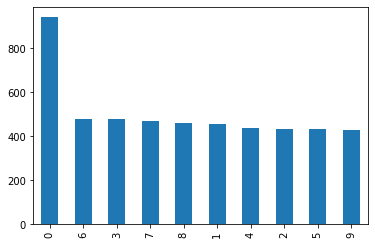

In [22]:
nic.Check_digit.value_counts().plot.bar()

In [23]:
nic['Special_ltr'] = nic['ID'].str.strip().str[9]

In [24]:
nic.head()

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_num,Check_digit,Special_ltr
0,911232910V,911232910,91,123,291,0,V
1,937370580V,937370580,93,737,058,0,V
2,937784210V,937784210,93,778,421,0,V
3,940491240V,940491240,94,049,124,0,V
4,942251610V,942251610,94,225,161,0,V


In [25]:
# nic.Extracted_1.isdigit()
# whether only numeric value is present in Quarters column of dataframe in Python
nic['Extracted1_isdigit'] = list(map(lambda x: x.isdigit(), nic['Extracted_']))
print (nic)


# map(lambda x: x.isdigit(), nic['Extracted_1'])

              ID Extracted_ Birth_year Birthdayof_year Serial_num Check_digit  \
0     911232910V  911232910         91             123        291           0   
1     937370580V  937370580         93             737        058           0   
2     937784210V  937784210         93             778        421           0   
3     940491240V  940491240         94             049        124           0   
4     942251610V  942251610         94             225        161           0   
...          ...        ...        ...             ...        ...         ...   
5018  988190969V  988190969         98             819        096           9   
5019  988330809V  988330809         98             833        080           9   
5020  988501069V  988501069         98             850        106           9   
5021  995150549V  995150549         99             515        054           9   
5022  995291649V  995291649         99             529        164           9   

     Special_ltr  Extracted

In [26]:
nic.Extracted1_isdigit.value_counts()

True     5011
False      12
Name: Extracted1_isdigit, dtype: int64

In [27]:
nic[nic.Extracted1_isdigit.eq(False)]

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_num,Check_digit,Special_ltr,Extracted1_isdigit
651,9776310S0V,9776310S0,97,763,10S,0,V,False
675,977904S60V,977904S60,97,790,4S6,0,V,False
1138,9757U1131V,9757U1131,97,57U,113,1,V,False
1283,97S331881V,97S331881,97,S33,188,1,V,False
1709,9778729S2V,9778729S2,97,787,29S,2,V,False
1740,9785S3672V,9785S3672,97,85S,367,2,V,False
1801,9872316U2V,9872316U2,98,723,16U,2,V,False
1887,961S53253V,961S53253,96,1S5,325,3,V,False
2194,97S572803V,97S572803,97,S57,280,3,V,False
2248,985S41353V,985S41353,98,5S4,135,3,V,False


In [28]:
nic['Extracted1_isdigit'].unique()

array([ True, False])

In [29]:
nic = nic[nic.Extracted1_isdigit != False]

In [30]:
nic.shape

(5011, 8)

In [31]:
nic.head()

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_num,Check_digit,Special_ltr,Extracted1_isdigit
0,911232910V,911232910,91,123,291,0,V,True
1,937370580V,937370580,93,737,058,0,V,True
2,937784210V,937784210,93,778,421,0,V,True
3,940491240V,940491240,94,049,124,0,V,True
4,942251610V,942251610,94,225,161,0,V,True


In [32]:
# nic['Extracted_1'].apply(lambda s: pd.to_numeric(s, errors='coerce').isna().all())

In [33]:
nic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5022
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5011 non-null   object
 1   Extracted_          5011 non-null   object
 2   Birth_year          5011 non-null   object
 3   Birthdayof_year     5011 non-null   object
 4   Serial_num          5011 non-null   object
 5   Check_digit         5011 non-null   object
 6   Special_ltr         5011 non-null   object
 7   Extracted1_isdigit  5011 non-null   bool  
dtypes: bool(1), object(7)
memory usage: 318.1+ KB


In [34]:
duplicate = nic.duplicated()
print(duplicate.sum())

4


In [35]:
duplicate[duplicate]

952     True
1166    True
1849    True
3350    True
dtype: bool

In [36]:
nic[duplicate]

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_num,Check_digit,Special_ltr,Extracted1_isdigit
952,947942301V,947942301,94,794,230,1,V,True
1166,976161831V,976161831,97,616,183,1,V,True
1849,951461423V,951461423,95,146,142,3,V,True
3350,968583646V,968583646,96,858,364,6,V,True


In [37]:
nic.drop_duplicates(keep='first', inplace =True)

In [38]:
duplicate = nic.duplicated()
print(duplicate.sum())

0


In [39]:
nic['Birth_year']=nic['Birth_year'].astype(int)
nic['Birthdayof_year']=nic['Birthdayof_year'].astype(int)
nic['Serial_num']=nic['Serial_num'].astype(int)
nic['Check_digit']=nic['Check_digit'].astype(int)

In [40]:
nic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5007 entries, 0 to 5022
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5007 non-null   object
 1   Extracted_          5007 non-null   object
 2   Birth_year          5007 non-null   int32 
 3   Birthdayof_year     5007 non-null   int32 
 4   Serial_num          5007 non-null   int32 
 5   Check_digit         5007 non-null   int32 
 6   Special_ltr         5007 non-null   object
 7   Extracted1_isdigit  5007 non-null   bool  
dtypes: bool(1), int32(4), object(3)
memory usage: 239.6+ KB


In [41]:
# nic['Extracted_1'] = nic['Extracted_1'].astype(float)

In [42]:
X = nic.iloc[:,2:5]
y = nic.iloc[:,5]

In [43]:
X.head()

,Birth_year,Birthdayof_year,Serial_num
0,91,123,291
1,93,737,58
2,93,778,421
3,94,49,124
4,94,225,161


In [44]:
X.shape

(5007, 3)

In [45]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Check_digit, dtype: int32

In [46]:
# # smote = SMOTE('minority')

# # X_sm, y_sm = smote.fit_resample(X,y)
# # print(X_sm.shape, y_sm.shape)
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

In [47]:
y.value_counts()

0    939
6    480
3    474
7    468
8    462
1    454
4    438
5    432
2    430
9    430
Name: Check_digit, dtype: int64

In [48]:
# #undersampling
# rus = RandomUnderSampler()
# X,y = rus.fit_resample(X,y)

In [49]:
#oversampling
rus = RandomOverSampler()
X,y = rus.fit_resample(X,y)

In [50]:
# #define pipeline
# over = RandomOverSampler(sampling_strategy = 0.5)
# under = RandomUnderSampler(sampling_strategy = 0.4)
# steps = [('o',over),('u',under)]
# pipeline = Pipeline(steps=steps)

# # transform dataset
# X,y = pipline.fit_resample(X,y)

In [51]:
y.value_counts()

7    939
6    939
5    939
4    939
3    939
2    939
9    939
1    939
8    939
0    939
Name: Check_digit, dtype: int64

In [52]:
#training data set to train the classification model as well as some test data to check the accuracy of the model build.
(X_train, X_test, y_train, y_test) = train_test_split(X,y, test_size=0.22, random_state=42)

In [53]:
X_train.shape

(7324, 3)

In [54]:
X_test.shape

(2066, 3)

In [55]:
y_train.shape

(7324,)

In [56]:
y_test.shape

(2066,)

In [57]:
#Building the classifier
# DT = DecisionTreeClassifier(random_state=0)

In [58]:
# DT

In [59]:
#fit the classifer to the training set
# DT.fit(X_train,y_train)

#### SVM

In [60]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

In [61]:
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
y_hat_test=svclassifier.predict(X_test)
y_hat_test

array([6, 6, 6, ..., 1, 0, 1])

In [63]:
y_hat_train=svclassifier.predict(X_train)
y_hat_train

array([0, 0, 9, ..., 9, 1, 5])

In [64]:
train_f1 = f1_score(y_train, y_hat_train,average = 'macro')
test_f1 = f1_score(y_test, y_hat_test,average = 'macro')

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

Train f1 Score: 0.07029515473538739
Test f1 Score: 0.06549383339373857


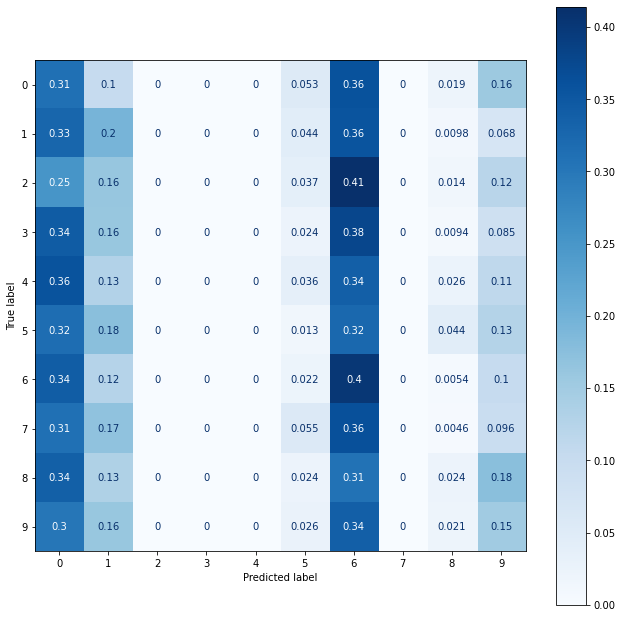

In [65]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(svclassifier, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [66]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_hat_test))
print(accuracy_score(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.10      0.31      0.15       206
           1       0.13      0.20      0.15       205
           2       0.00      0.00      0.00       215
           3       0.00      0.00      0.00       212
           4       0.00      0.00      0.00       195
           5       0.04      0.01      0.02       228
           6       0.10      0.40      0.16       184
           7       0.00      0.00      0.00       218
           8       0.14      0.02      0.04       211
           9       0.12      0.15      0.13       192

    accuracy                           0.10      2066
   macro avg       0.06      0.11      0.07      2066
weighted avg       0.06      0.10      0.06      2066

0.10406582768635043


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### KNN

In [67]:
ks = np.arange(1, 20)
scores = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=15)
    score.mean()
    scores.append(score.mean())


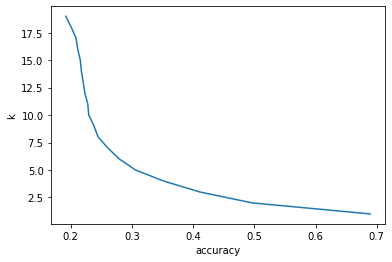

In [68]:
plt.plot(scores, ks)
plt.xlabel('accuracy')
plt.ylabel('k')
plt.show()

In [69]:
model = KNeighborsClassifier(n_neighbors=1)

In [70]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [71]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 7, ..., 8, 4, 8])

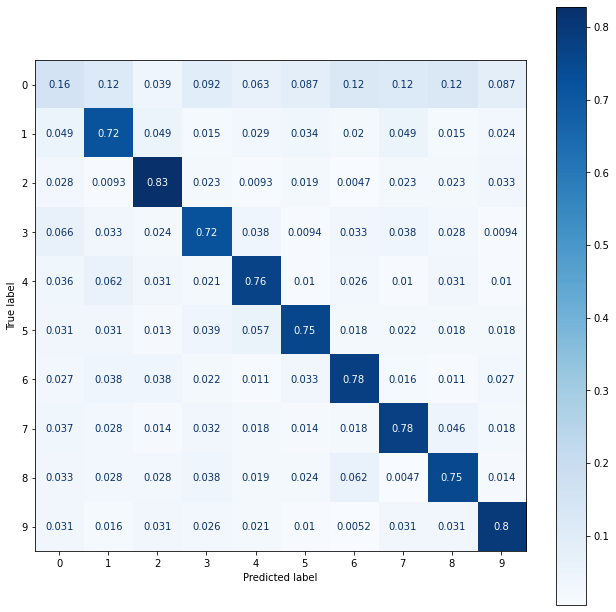

In [72]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [73]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.16      0.21       206
           1       0.67      0.72      0.69       205
           2       0.77      0.83      0.80       215
           3       0.71      0.72      0.71       212
           4       0.73      0.76      0.74       195
           5       0.78      0.75      0.77       228
           6       0.69      0.78      0.73       184
           7       0.73      0.78      0.75       218
           8       0.70      0.75      0.72       211
           9       0.75      0.80      0.77       192

    accuracy                           0.70      2066
   macro avg       0.68      0.70      0.69      2066
weighted avg       0.68      0.70      0.69      2066

0.7037754114230397


#### KNN hyper parameter tuning

In [74]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 26
Best p: 2
Best n_neighbors: 1


In [75]:
y_pred_knn2 = best_model.predict(X_test)
y_pred_knn2

array([2, 3, 7, ..., 8, 4, 8])

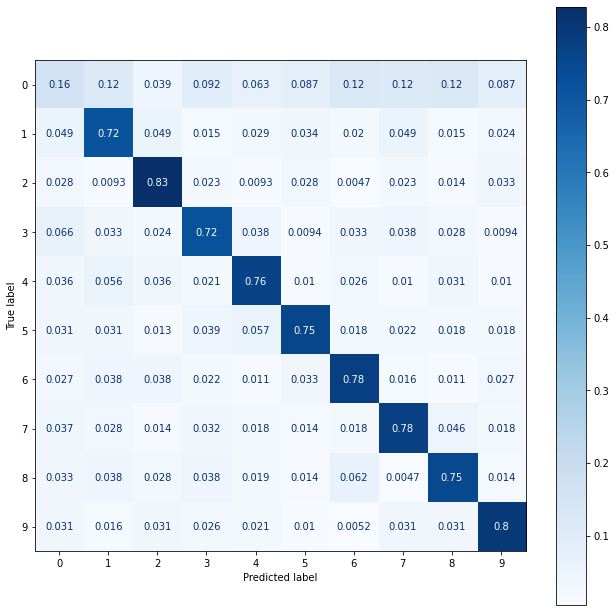

In [76]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(best_model, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [77]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred_knn2))
print(accuracy_score(y_test,y_pred_knn2))

              precision    recall  f1-score   support

           0       0.31      0.16      0.21       206
           1       0.66      0.72      0.69       205
           2       0.76      0.83      0.79       215
           3       0.71      0.72      0.71       212
           4       0.73      0.76      0.74       195
           5       0.78      0.75      0.77       228
           6       0.69      0.78      0.73       184
           7       0.73      0.78      0.75       218
           8       0.71      0.75      0.73       211
           9       0.75      0.80      0.77       192

    accuracy                           0.70      2066
   macro avg       0.68      0.70      0.69      2066
weighted avg       0.68      0.70      0.69      2066

0.7037754114230397


In [97]:
y_score1 = best_model.predict_proba(X_test)[:,1]
y_score1

array([1., 0., 0., ..., 0., 0., 0.])

#### RF

In [78]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=150, criterion = 'entropy', random_state = 15)

score=cross_val_score(randomforest_classifier,X_train,y_train,cv=10)

In [79]:
score.mean()

0.6721700996727276

In [80]:
randomforest_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=15)

In [81]:
pred_rf = randomforest_classifier.predict(X_test)

In [82]:
pred_rf

array([3, 3, 7, ..., 8, 4, 8])

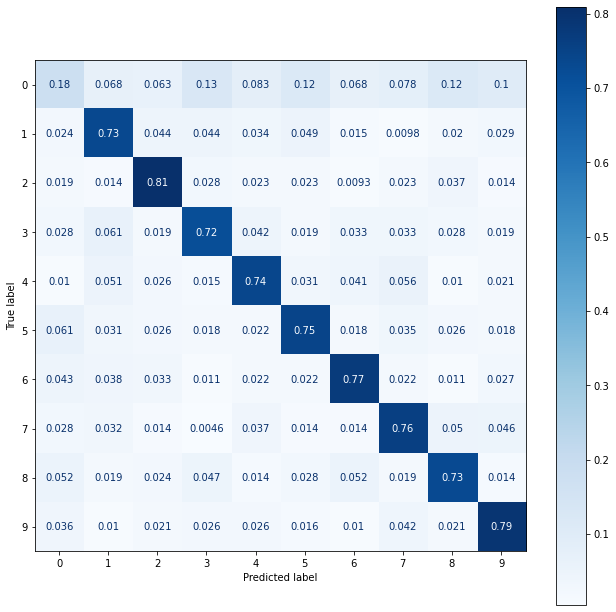

In [83]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(randomforest_classifier, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [84]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred_rf))
print(accuracy_score(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.37      0.18      0.24       206
           1       0.69      0.73      0.71       205
           2       0.76      0.81      0.78       215
           3       0.70      0.72      0.71       212
           4       0.70      0.74      0.72       195
           5       0.72      0.75      0.73       228
           6       0.72      0.77      0.75       184
           7       0.72      0.76      0.74       218
           8       0.70      0.73      0.71       211
           9       0.72      0.79      0.75       192

    accuracy                           0.70      2066
   macro avg       0.68      0.70      0.68      2066
weighted avg       0.68      0.70      0.68      2066

0.6974830590513069


#### XgBoost

In [85]:
seed =7
test_size=0.25
X_train, X_test, ytrain, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)

In [86]:
xg_model = XGBClassifier()
xg_model.fit(X_train,ytrain)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
pred_xg = xg_model.predict(X_test)

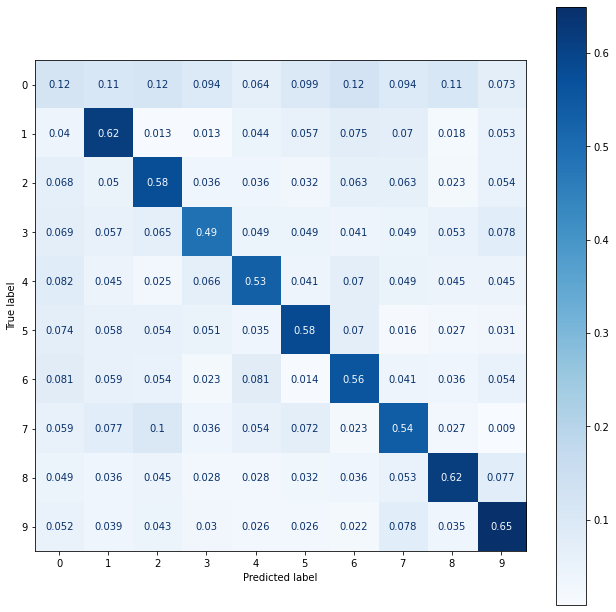

In [88]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(xg_model, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [89]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred_xg))
print(accuracy_score(y_test,pred_xg))

              precision    recall  f1-score   support

           0       0.17      0.12      0.14       233
           1       0.53      0.62      0.57       227
           2       0.51      0.58      0.54       222
           3       0.57      0.49      0.53       245
           4       0.57      0.53      0.55       243
           5       0.60      0.58      0.59       257
           6       0.50      0.56      0.53       222
           7       0.50      0.54      0.52       221
           8       0.64      0.62      0.63       247
           9       0.57      0.65      0.61       231

    accuracy                           0.53      2348
   macro avg       0.52      0.53      0.52      2348
weighted avg       0.52      0.53      0.52      2348

0.5281090289608177


#### Grid Search 

In [90]:
params = {'min_child_weight' : [1,5,10],
         'gamma' : [0.5,1,1.5,2,5],
         'subsample' : [0.6,0.8,1.0],
         'colsample_bytree' : [0.6,0.8,1.0],
         'max_depth' : [3,4,5]}

In [91]:
xgb = XGBClassifier(learning_rate = 0.02,n_estimators = 600, objective = 'multi:softprob', silent = True, nthread =1, 
                    scale_pos_weight= 85)

In [92]:
X_train.shape

(7042, 3)

In [93]:
y_train.shape

(7324,)

In [94]:
folds=5
param_comb =5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state =10)

random_search = RandomizedSearchCV(xgb, param_distributions = params, n_iter=param_comb, scoring = 'accuracy', n_jobs =-1, cv=skf,
                                  verbose =1, random_state=10)

random_search.fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [7042, 7324]

In [ ]:
pred_grdXG= random_search.predict(X_test)

In [ ]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(random_search, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred_grdXG))
print(accuracy_score(y_test,pred_grdXG))

#### LR oneVSrest

In [ ]:
(X_train_LR, X_test_LR, y_train_LR, y_test_LR) = train_test_split(X,y, test_size=0.22, random_state=42)

In [ ]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])


In [ ]:
# Training logistic regression model on train data
LogReg_pipeline.fit(X_train, y_train)

In [ ]:
# calculating test accuracy
prediction = LogReg_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))
print("\n")

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

#### Prediction for unseen data

In [98]:
prediction_tsk1 = pd.read_csv('Pred_task1.csv')

In [99]:
prediction_tsk1.head()

,ID
0,54178341
1,51782160
2,94693202
3,87352340
4,90705025


In [100]:
prediction_tsk1['ID']=prediction_tsk1['ID'].astype(str)
prediction_tsk1['Birth_year']=prediction_tsk1['ID'].str.strip().str[0:2]
prediction_tsk1['Birthdayof_year']=prediction_tsk1['ID'].str.strip().str[2:5]
prediction_tsk1['Serial_num']=prediction_tsk1['ID'].str.strip().str[5:8]

In [101]:
prediction_tsk1

,ID,Birth_year,Birthdayof_year,Serial_num
0,54178341,54,178,341
1,51782160,51,782,160
2,94693202,94,693,202
3,87352340,87,352,340
4,90705025,90,705,025


In [102]:
prediction_tsk1['Extracted1_isdigit'] = list(map(lambda x: x.isdigit(), prediction_tsk1['ID']))
prediction_tsk1

,ID,Birth_year,Birthdayof_year,Serial_num,Extracted1_isdigit
0,54178341,54,178,341,True
1,51782160,51,782,160,True
2,94693202,94,693,202,True
3,87352340,87,352,340,True
4,90705025,90,705,025,True


In [103]:
prediction_tsk1 = prediction_tsk1[prediction_tsk1.Extracted1_isdigit != False]

In [104]:
prediction_tsk1

,ID,Birth_year,Birthdayof_year,Serial_num,Extracted1_isdigit
0,54178341,54,178,341,True
1,51782160,51,782,160,True
2,94693202,94,693,202,True
3,87352340,87,352,340,True
4,90705025,90,705,025,True


In [105]:
duplicate = prediction_tsk1.duplicated()
print(duplicate.sum())

0


In [106]:
prediction_tsk1['Birth_year']=prediction_tsk1['Birth_year'].astype(int)
prediction_tsk1['Birthdayof_year']=prediction_tsk1['Birthdayof_year'].astype(int)
prediction_tsk1['Serial_num']=prediction_tsk1['Serial_num'].astype(int)

In [107]:
prediction_tsk1.columns

Index(['ID', 'Birth_year', 'Birthdayof_year', 'Serial_num',
       'Extracted1_isdigit'],
      dtype='object')

In [108]:
X_pred= prediction_tsk1[['Birth_year', 'Birthdayof_year', 'Serial_num']]

In [110]:
pred_test_knn = best_model.predict(X_pred)

In [111]:
pred_test_knn

array([6, 0, 6, 4, 9])

In [112]:
prediction_tsk1['Check_digit_knn'] = pred_test_knn

In [113]:
prediction_tsk1

,ID,Birth_year,Birthdayof_year,Serial_num,Extracted1_isdigit,Check_digit_knn
0,54178341,54,178,341,True,6
1,51782160,51,782,160,True,0
2,94693202,94,693,202,True,6
3,87352340,87,352,340,True,4
4,90705025,90,705,25,True,9


In [ ]:
pred_test_knn = model.predict(X_pred)
pred_test_knn

In [ ]:
prediction_tsk1['Check_digit_KNN'] = pred_test_knn
prediction_tsk1

In [ ]:
pred_test_knn2 = best_model.predict(X_pred)
pred_test_knn2

In [ ]:
prediction_tsk1['Check_digit_KNN2'] = pred_test_knn2
prediction_tsk1